In [1]:
# Install the client library,using pip.

!pip install google-cloud-automl

In [2]:
from google.cloud import bigquery
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("muted")

# Session 1: The data--gathering and preparing

In [3]:
%%bigquery train
SELECT
    *
FROM `demo3.train`

In [4]:
%%bigquery test
SELECT
    *
FROM `demo3.test`

In [5]:
train.head()

,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars
0,16,Sat,41.892508,-87.626215,41.920452,-87.679955,0,0,12.05
1,9,Sat,41.892042,-87.631864,41.920452,-87.679955,0,0,15.65
2,18,Tue,41.979071,-87.903040,41.920452,-87.679955,0,0,29.05
3,13,Sat,41.900266,-87.632109,41.920452,-87.679955,0,0,15.45
4,17,Fri,41.914616,-87.631717,41.920452,-87.679955,0,0,8.65


In [6]:
train.dtypes

hour                   int64
weekday               object
pickup_latitude      float64
pickup_longitude     float64
dropoff_latitude     float64
dropoff_longitude    float64
k2                     int64
is_luxury              int64
fare_dollars         float64
dtype: object

In [7]:
train.isnull().sum()

hour                 0
weekday              0
pickup_latitude      0
pickup_longitude     0
dropoff_latitude     0
dropoff_longitude    0
k2                   0
is_luxury            0
fare_dollars         0
dtype: int64

In [8]:
train.describe()

,hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars
count,58321.000000,58321.000000,58321.000000,58321.000000,58321.000000,58321.000000,58321.000000,58321.000000
mean,11.331510,41.903629,-87.663460,41.904100,-87.661239,0.099227,0.028635,15.135680
std,5.557207,0.039958,0.076259,0.042102,0.066632,0.298969,0.166779,11.307057
min,0.000000,41.673820,-87.913625,41.673820,-87.913625,0.000000,0.000000,1.340000
25%,7.000000,41.880994,-87.655998,41.880994,-87.663416,0.000000,0.000000,7.650000
50%,12.000000,41.893216,-87.633308,41.895033,-87.637844,0.000000,0.000000,10.650000
75%,15.000000,41.922686,-87.626211,41.928432,-87.626215,0.000000,0.000000,17.450000
max,23.000000,42.016046,-87.551428,42.015934,-87.534903,1.000000,1.000000,154.650000


In [9]:
test.head()

,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars
0,5,Mon,41.922686,-87.649489,41.899602,-87.633308,0,0,0.1065
1,1,Mon,41.921778,-87.641460,41.880994,-87.632746,0,0,0.1200
2,12,Fri,41.904935,-87.649907,41.885281,-87.657233,0,1,0.1500
3,5,Fri,41.878866,-87.625192,41.922686,-87.649489,0,1,0.1345
4,11,Mon,41.880994,-87.632746,41.904935,-87.649907,0,0,0.0945


In [10]:
test.dtypes

hour                   int64
weekday               object
pickup_latitude      float64
pickup_longitude     float64
dropoff_latitude     float64
dropoff_longitude    float64
k2                     int64
is_luxury              int64
fare_dollars         float64
dtype: object

In [11]:
test.isnull().sum()

hour                  0
weekday               0
pickup_latitude      10
pickup_longitude     10
dropoff_latitude     11
dropoff_longitude    11
k2                    0
is_luxury             0
fare_dollars          0
dtype: int64

In [12]:
test.describe()

,hour,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars
count,100.000000,90.000000,90.000000,89.000000,89.000000,100.000000,100.000000,100.000000
mean,12.510000,41.899677,-87.654925,41.897212,-87.650229,0.950000,0.030000,0.114738
std,5.739276,0.031701,0.066765,0.032322,0.051947,0.219043,0.171447,0.095025
min,1.000000,41.792592,-87.913625,41.794090,-87.903040,0.000000,0.000000,0.040500
25%,7.750000,41.880994,-87.648812,41.880994,-87.655998,1.000000,0.000000,0.060000
50%,14.000000,41.892042,-87.632746,41.892508,-87.637844,1.000000,0.000000,0.080250
75%,17.000000,41.907024,-87.626215,41.914616,-87.631717,1.000000,0.000000,0.112500
max,23.000000,41.980264,-87.612945,41.983636,-87.592311,1.000000,1.000000,0.512500


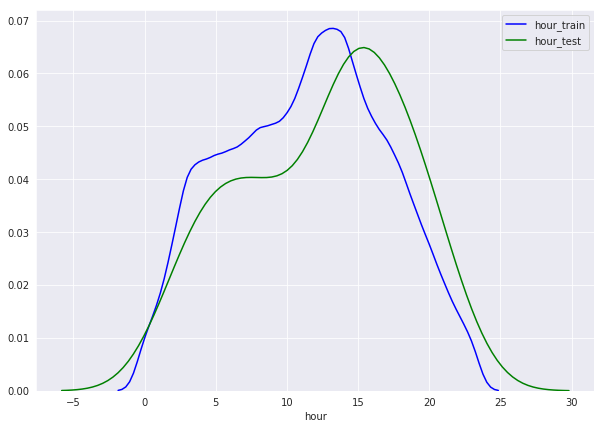

In [13]:
# plot the hour distribution (hour of the day)

plt.figure(figsize=(10,7))
sns.distplot(train['hour'], color='blue', label='hour_train', hist=False)
sns.distplot(test['hour'], color='green', label='hour_test', hist=False)
plt.show()

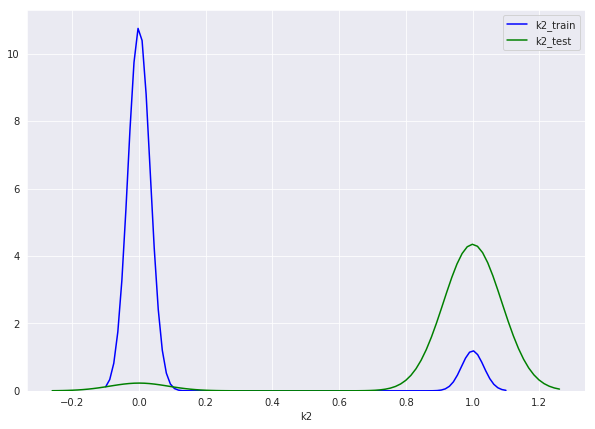

In [14]:
# plot the k2 distribution (k2: cluster of the driver based on the clustering results)

plt.figure(figsize=(10,7))
sns.distplot(train['k2'], color='blue', label='k2_train', hist=False)
sns.distplot(test['k2'], color='green', label='k2_test', hist=False)
plt.show()

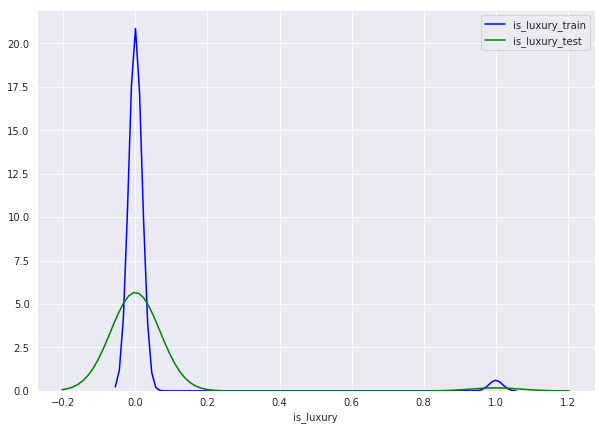

In [15]:
# plot the is_luxury distribution  ==> most of the trips are non-luxury, in both train and test dataset

plt.figure(figsize=(10,7))
sns.distplot(train['is_luxury'], color='blue', label='is_luxury_train', hist=False)
sns.distplot(test['is_luxury'], color='green', label='is_luxury_test', hist=False)
plt.show()

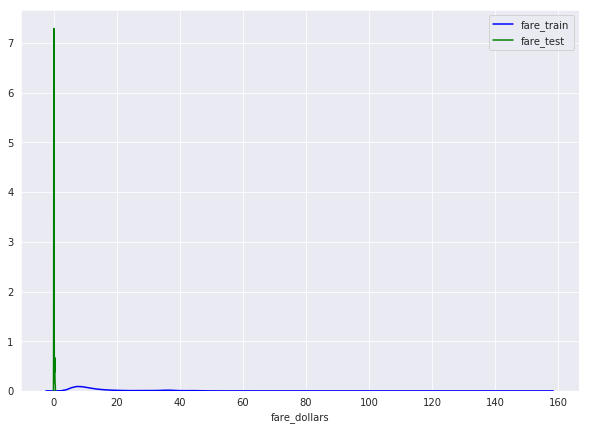

In [16]:
# plot the fare distribution

plt.figure(figsize=(10,7))
sns.distplot(train['fare_dollars'], color='blue', label='fare_train', hist=False)
sns.distplot(test['fare_dollars'], color='green', label='fare_test', hist=False)
plt.show()

# Session 2: Import training set to AutoML Tables

In [17]:
# Authenticate using service account key and create a client.

from google.cloud import automl_v1beta1 as automl

# Upload service account key
keyfile_name = '$[account key json file name here], removed by security reason'
# Authenticate and create an AutoML client.
client = automl.AutoMlClient.from_service_account_file(keyfile_name)
# Authenticate and create a prediction service client.
prediction_client = automl.PredictionServiceClient.from_service_account_file(keyfile_name)

In [ ]:
# GCP project ID and location

project_id = '$[GCP project id here], removed by security reason'
location = 'us-central1'  # only beta available in this location now

location_path = client.location_path(project_id, location)
location_path

In [ ]:
# List existing dataset

list_datasets_response = client.list_datasets(location_path)
datasets = {
    dataset.display_name: dataset.name for dataset in list_datasets_response}
datasets

In [ ]:
# List existing models. 

list_models_response = client.list_models(location_path)
models = {model.display_name: model.name for model in list_models_response}
models

In [21]:
# create dataset in AutoML

dataset_display_name = 'demo3_chicago_taxi_fare' 
create_dataset_response = client.create_dataset(
    location_path,
    {'display_name': dataset_display_name, 'tables_dataset_metadata': {}})
dataset_name = create_dataset_response.name
create_dataset_response

name: "projects/401832599639/locations/us-central1/datasets/TBL2662357455496806400"
display_name: "demo3_chicago_taxi_fare"
create_time {
  seconds: 1561592946
  nanos: 627315000
}
etag: "AB3BwFo1d5g8qGIdEdpVR7N0oitFT9vagzsgtMC5tWXkhy3KpSD9zQa5Jisdz12gRUA6"
tables_dataset_metadata {
  stats_update_time {
  }
}

In [22]:
# get training data path

dataset_bq_input_uri = '$[bigquery dir here], removed by security reason'

# Define input configuration.
input_config = {
    'bigquery_source': {
        'input_uri': dataset_bq_input_uri
    }
}

In [23]:
# Import training data table into AutoML dataset 

import_data_response = client.import_data(dataset_name, input_config)
print('Dataset import operation: {}'.format(import_data_response.operation))

# Wait until import is done.
import_data_result = import_data_response.result()
import_data_result

Dataset import operation: name: "projects/401832599639/locations/us-central1/operations/TBL1111232421728092160"
metadata {
  type_url: "type.googleapis.com/google.cloud.automl.v1beta1.OperationMetadata"
  value: "\032\014\010\373\210\320\350\005\020\340\361\327\271\003\"\014\010\373\210\320\350\005\020\340\361\327\271\003z\000"
}



In [24]:
# list existing datasets in AutoMl, to check if successfully import

client = automl.AutoMlClient()

# A resource that represents Google Cloud Platform location.
project_location = client.location_path(project_id, location)

# List all the datasets available in the region by applying filter.
response = client.list_datasets(project_location)

print("List of datasets:")
for dataset in response:
    # Display the dataset information.
    print("Dataset name: {}".format(dataset.name))
    print("Dataset id: {}".format(dataset.name.split("/")[-1]))
    print("Dataset display name: {}".format(dataset.display_name))
    metadata = dataset.tables_dataset_metadata
    print("Dataset primary table spec id: {}".format(
        metadata.primary_table_spec_id))
    print("Dataset target column spec id: {}".format(
        metadata.target_column_spec_id))
    print("Dataset target column spec id: {}".format(
        metadata.target_column_spec_id))
    print("Dataset weight column spec id: {}".format(
        metadata.weight_column_spec_id))
    print("Dataset ml use column spec id: {}".format(
        metadata.ml_use_column_spec_id))
    print("Dataset example count: {}".format(dataset.example_count))
    print("Dataset create time:")
    print("\tseconds: {}".format(dataset.create_time.seconds))
    print("\tnanos: {}".format(dataset.create_time.nanos))
    print("\n")

List of datasets:
Dataset name: projects/401832599639/locations/us-central1/datasets/TBL2662357455496806400
Dataset id: TBL2662357455496806400
Dataset display name: demo3_chicago_taxi_fare
Dataset primary table spec id: 6309279195155398656
Dataset target column spec id: 
Dataset target column spec id: 
Dataset weight column spec id: 
Dataset ml use column spec id: 
Dataset example count: 58321
Dataset create time:
	seconds: 1561592946
	nanos: 627315000


Dataset name: projects/401832599639/locations/us-central1/datasets/TBL6434878607419506688
Dataset id: TBL6434878607419506688
Dataset display name: ct_autoML
Dataset primary table spec id: 2852784073334587392
Dataset target column spec id: 7373993478935543808
Dataset target column spec id: 7373993478935543808
Dataset weight column spec id: 
Dataset ml use column spec id: 
Dataset example count: 77599
Dataset create time:
	seconds: 1557965217
	nanos: 964480000


Dataset name: projects/401832599639/locations/us-central1/datasets/TBL697699

In [25]:
# Schema review

import google.cloud.automl_v1beta1.proto.data_types_pb2 as data_types

# List table specs
list_table_specs_response = client.list_table_specs(dataset_name)
table_specs = [s for s in list_table_specs_response]

# List column specs
table_spec_name = table_specs[0].name
list_column_specs_response = client.list_column_specs(table_spec_name)
column_specs = {s.display_name: s for s in list_column_specs_response}
[(x, data_types.TypeCode.Name(
  column_specs[x].data_type.type_code)) for x in column_specs.keys()]

[('dropoff_latitude', 'FLOAT64'),
 ('weekday', 'CATEGORY'),
 ('pickup_longitude', 'FLOAT64'),
 ('dropoff_longitude', 'FLOAT64'),
 ('is_luxury', 'CATEGORY'),
 ('k2', 'CATEGORY'),
 ('fare_dollars', 'FLOAT64'),
 ('pickup_latitude', 'FLOAT64'),
 ('hour', 'FLOAT64')]

In [32]:
column_names = [x for x in column_specs.keys()]
target = 'fare_dollars'
target_index = column_names.index(target)
features = column_names[:target_index] + column_names[target_index+1 :]
print(features)

feature_type = [data_types.TypeCode.Name(
  column_specs[x].data_type.type_code) for x in column_specs.keys()]
feature_Type = feature_type[:target_index] + feature_type[target_index+1 :]
print(feature_type)

['dropoff_latitude', 'weekday', 'pickup_longitude', 'dropoff_longitude', 'is_luxury', 'k2', 'pickup_latitude', 'hour']
['FLOAT64', 'CATEGORY', 'FLOAT64', 'FLOAT64', 'CATEGORY', 'CATEGORY', 'FLOAT64', 'FLOAT64', 'FLOAT64']


In [30]:
def create_update_column_sepc_dict(column_name, type_code, nullable):
    """
    Create `update_column_spec_dict` with a given column name and target `type_code`.
    Inputs:
        column_name: string. Represents column name.
        type_code: string. Represents variable type. See details: \
                   https://cloud.google.com/automl-tables/docs/reference/rest/v1beta1/projects.locations.datasets.tableSpecs.columnSpecs#typecode
        nullable: boolean. If true, this DataType can also be null.
    Return:
        update_column_spec_dict: dictionary. Encodes the target column specs.
    """
    update_column_spec_dict = {
        'name': column_specs[column_name].name,
        'data_type': {
            'type_code': type_code,
            'nullable': nullable
        }
    }
    return update_column_spec_dict

In [35]:
# Update dataset

is_nullable = is_nullable = [True] * len(features)

for i in range(len(features)):
    column_name = features[i]
    nullable = is_nullable[i]
    f_type = feature_type[i]
    update_column_spec_dict = create_update_column_sepc_dict(column_name, f_type, nullable)
    update_column_response = client.update_column_spec(update_column_spec_dict)

In [36]:
# Update dataset - split features and target

label_column_name = 'fare_dollars' 
label_column_spec = column_specs[label_column_name]
label_column_id = label_column_spec.name.rsplit('/', 1)[-1]
print('Label column ID: {}'.format(label_column_id))

# Define the values of the fields to be updated.
update_dataset_dict = {
    'name': dataset_name,
    'tables_dataset_metadata': {
        'target_column_spec_id': label_column_id
    }
}

update_dataset_response = client.update_dataset(update_dataset_dict)
update_dataset_response

Label column ID: 6761477541334089728


name: "projects/401832599639/locations/us-central1/datasets/TBL2662357455496806400"
display_name: "demo3_chicago_taxi_fare"
create_time {
  seconds: 1561592946
  nanos: 627315000
}
etag: "AB3BwFqpTDNnFzZD6_xeVF6TAfAUtzD6eqQTs_vBg0qFmXtuOFQqKUu3vjAseWh1ElM="
example_count: 58321
tables_dataset_metadata {
  primary_table_spec_id: "6309279195155398656"
  target_column_spec_id: "6761477541334089728"
  stats_update_time {
    seconds: 1561593060
    nanos: 173000000
  }
}

# Session 3: Managing and training AutoML Tables model

In [37]:
model_display_name = 'demo3_model' 

# the time budge is 5 hours
model_dict = {
    'display_name': model_display_name,
    'dataset_id': dataset_name.rsplit('/', 1)[-1],
    'tables_model_metadata': {'train_budget_milli_node_hours': 5000}
}

create_model_response = client.create_model(location_path, model_dict)
print('Dataset import operation: {}'.format(create_model_response.operation))

Dataset import operation: name: "projects/401832599639/locations/us-central1/operations/TBL1496853139821690880"
metadata {
  type_url: "type.googleapis.com/google.cloud.automl.v1beta1.OperationMetadata"
  value: "\032\014\010\347\217\320\350\005\020\320\317\322\232\003\"\014\010\347\217\320\350\005\020\320\317\322\232\003R\000"
}



In [ ]:
# Wait until model training is done.
create_model_result = create_model_response.result()
model_name = create_model_result.name
create_model_result

In [40]:
model_id = model_name.split('/')[-1]
print(model_id)

TBL4988132411498823680


# Session 4: Training performance

In [41]:
# general regression metric results

metrics= [x for x in client.list_model_evaluations(model_name)][-1]
metrics.regression_evaluation_metrics

root_mean_squared_error: 3.860062837600708
mean_absolute_error: 2.2028591632843018
mean_absolute_percentage_error: 16.203702926635742
r_squared: 0.8772143721580505
root_mean_squared_log_error: 0.21583491563796997

In [42]:
# raw feature importance

model = client.get_model(model_name)
feat_list = [(x.feature_importance, x.column_display_name) for x in model.tables_model_metadata.tables_model_column_info]
feat_list.sort(reverse=True)
feat_list[:15]

[(0.28349241614341736, 'pickup_longitude'),
 (0.23034091293811798, 'dropoff_latitude'),
 (0.2298014909029007, 'pickup_latitude'),
 (0.20292502641677856, 'dropoff_longitude'),
 (0.030780265107750893, 'hour'),
 (0.013594786636531353, 'weekday'),
 (0.007886284030973911, 'k2'),
 (0.0011788386618718505, 'is_luxury')]

# Session 5: Making batch predictions

In [160]:
%%bigquery test
SELECT
    *
FROM 
`demo3.test`

In [161]:
print(test.shape)
test.head()

(64, 9)


,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars
0,3,Tue,NaN,NaN,NaN,NaN,0,0,8.50
1,6,Mon,NaN,NaN,NaN,NaN,0,0,17.45
2,3,Fri,NaN,NaN,41.980264,-87.913625,0,0,48.40
3,1,Sun,NaN,NaN,NaN,NaN,0,0,7.65
4,5,Wed,NaN,NaN,NaN,NaN,0,0,7.45


In [169]:
# make prediction and store result in BigQuery 

input_path = '$[bigquery dir here], removed by security reason'
output_path = '$[bigquery dir here], removed by security reason'

from google.cloud import automl_v1beta1 as automl
import csv

automl_client = automl.AutoMlClient()

# Get the full path of the model.
model_full_id = automl_client.model_path(
    project_id, location, model_id
)

# Create client for prediction service.
prediction_client = automl.PredictionServiceClient()

if input_path.startswith('bq'):
    input_config = {"bigquery_source": {"input_uri": input_path}}
else:
    # Get the multiple Google Cloud Storage URIs.
    input_uris = input_path.split(",").strip()
    input_config = {"gcs_source": {"input_uris": input_uris}}

if output_path.startswith('bq'):
    output_config = {"bigquery_destination": {"output_uri": output_path}}
else:
    # Get the multiple Google Cloud Storage URIs.
    output_config = {"gcs_destination": {"output_uri_prefix": output_path}}

# Query model
response = prediction_client.batch_predict(
    model_full_id, input_config, output_config)

print("Making batch prediction... ")
try:
    result = response.result()
except:
    pass
print("Batch prediction complete.\n{}".format(response.metadata))

Making batch prediction... 
Batch prediction complete.
create_time {
  seconds: 1561742232
  nanos: 573961000
}
update_time {
  seconds: 1561742517
  nanos: 425184000
}
batch_predict_details {
  input_config {
    bigquery_source {
      input_uri: "bq://hackathon1-183523.demo3.test"
    }
  }
  output_info {
    bigquery_output_dataset: "bq://hackathon1-183523.prediction_demo3_model_2019_06_28T10_17_12_417Z"
  }
}



In [172]:
# Check if batch prediction is complete

response.done()

True

In [ ]:
# make prediction and store result in cloud storage
input_path = '$[bigquery dir here], removed by security reason'
output_path = '$[cloud storage dir here], removed by security reason'

from google.cloud import automl_v1beta1 as automl
import csv

automl_client = automl.AutoMlClient()

# Get the full path of the model.
model_full_id = automl_client.model_path(
    project_id, location, model_id
)

# Create client for prediction service.
prediction_client = automl.PredictionServiceClient()

if input_path.startswith('bq'):
    input_config = {"bigquery_source": {"input_uri": input_path}}
else:
    # Get the multiple Google Cloud Storage URIs.
    input_uris = input_path.split(",").strip()
    input_config = {"gcs_source": {"input_uris": input_uris}}

if output_path.startswith('bq'):
    output_config = {"bigquery_destination": {"output_uri": output_path}}
else:
    # Get the multiple Google Cloud Storage URIs.
    output_config = {"gcs_destination": {"output_uri_prefix": output_path}}

# Query model
response = prediction_client.batch_predict(
    model_full_id, input_config, output_config)

print("Making batch prediction... ")
try:
    result = response.result()
except:
    pass
print("Batch prediction complete.\n{}".format(response.metadata))

Making batch prediction... 


In [173]:
# Check if batch prediction is complete

response.done()

True

In [174]:
# Check prediction results

gcs_output_directory = response.metadata.batch_predict_details.output_info.gcs_output_directory
result_file = gcs_output_directory + '/result.csv'
print('Batch prediction results are stored as: {}'.format(result_file))

Batch prediction results are stored as: gs://demo3_prediction/prediction-demo3_model-2019-06-28T17:22:26.601Z/result.csv


# Session 6: Evaluate predictions

In [175]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [178]:
%%bigquery pred
SELECT
    *
FROM 
`prediction_demo3_model_2019_06_28T10_17_12_417Z.predictions`

In [179]:
pred.head()

,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars,predicted_fare_dollars
0,3.0,Tue,NaN,NaN,NaN,NaN,0,0,8.50,"[{'tables': {'value': -5795.5810546875, 'predi..."
1,5.0,Wed,NaN,NaN,NaN,NaN,0,0,7.45,"[{'tables': {'value': -5795.63037109375, 'pred..."
2,3.0,Fri,NaN,NaN,41.980264,-87.913625,0,0,48.40,"[{'tables': {'value': 3690.22705078125, 'predi..."
3,6.0,Mon,NaN,NaN,NaN,NaN,0,0,17.45,"[{'tables': {'value': -5795.44091796875, 'pred..."
4,1.0,Sun,NaN,NaN,NaN,NaN,0,0,7.65,"[{'tables': {'value': -5796.4873046875, 'predi..."


In [180]:
# apply function to get prediction results from AutoML Tables, then update pd dataframe

def prediction(x):
    """
    decode the prediction from the nested table in Bigquery
    """
    return x[0]['tables']['value']

prediction = pred['predicted_fare_dollars'].apply(prediction)

pred['prediction'] = prediction

pred.head()

,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars,predicted_fare_dollars,prediction
0,3.0,Tue,NaN,NaN,NaN,NaN,0,0,8.50,"[{'tables': {'value': -5795.5810546875, 'predi...",-5795.581055
1,5.0,Wed,NaN,NaN,NaN,NaN,0,0,7.45,"[{'tables': {'value': -5795.63037109375, 'pred...",-5795.630371
2,3.0,Fri,NaN,NaN,41.980264,-87.913625,0,0,48.40,"[{'tables': {'value': 3690.22705078125, 'predi...",3690.227051
3,6.0,Mon,NaN,NaN,NaN,NaN,0,0,17.45,"[{'tables': {'value': -5795.44091796875, 'pred...",-5795.440918
4,1.0,Sun,NaN,NaN,NaN,NaN,0,0,7.65,"[{'tables': {'value': -5796.4873046875, 'predi...",-5796.487305


In [182]:
pred['prediction'].describe()

count      64.000000
mean     -288.501869
std      1504.917184
min     -5796.487305
25%         8.186570
50%        12.453754
75%        21.323927
max      3690.227051
Name: prediction, dtype: float64

since the predicted fare should not be any negative number, we will ignor the test row with null input in any column.

In [190]:
pred = pred.dropna(axis='rows')
print(pred.shape) 
pred.head()

(59, 13)


,hour,weekday,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,k2,is_luxury,fare_dollars,predicted_fare_dollars,prediction,AE,SE
5,7.0,Sun,41.857184,-87.620335,41.874005,-87.663518,0,0,9.00,"[{'tables': {'value': 9.624988555908203, 'pred...",9.624989,0.624989,0.390611
6,3.0,Tue,41.979071,-87.903040,41.880994,-87.632746,0,0,40.45,"[{'tables': {'value': 39.28802490234375, 'pred...",39.288025,1.161975,1.350186
7,16.0,Wed,41.979071,-87.903040,41.892508,-87.626215,0,0,43.00,"[{'tables': {'value': 38.191898345947266, 'pre...",38.191898,4.808102,23.117842
8,10.0,Sat,41.979071,-87.903040,41.859350,-87.617358,0,0,52.25,"[{'tables': {'value': 43.623130798339844, 'pre...",43.623131,8.626869,74.422872
9,8.0,Fri,41.979071,-87.903040,41.900266,-87.632109,0,0,44.75,"[{'tables': {'value': 38.33723449707031, 'pred...",38.337234,6.412766,41.123561


In [191]:
pred['AE'] = pred.apply(lambda x: np.abs(x['fare_dollars'] - x['prediction']), axis=1)
pred['SE'] = pred.apply(lambda x: np.abs(x['fare_dollars'] - x['prediction'])**2, axis=1)

In [192]:
pred['AE'].describe()

count    59.000000
mean      1.649011
std       1.666399
min       0.032120
25%       0.518224
50%       1.071329
75%       2.021519
max       8.626869
Name: AE, dtype: float64

In [193]:
MAE1 = mean_absolute_error(pred['fare_dollars'], pred['prediction'])
print('MAE is: ', MAE1)

MAE is:  1.6490113229266667


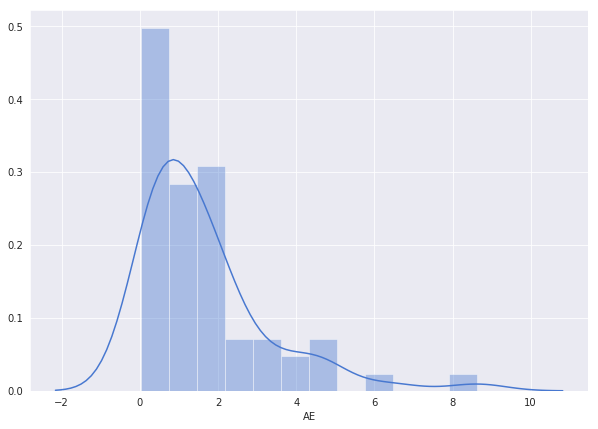

In [194]:
plt.figure(figsize=(10,7))
sns.distplot(pred['AE'])

In [195]:
pred['SE'].describe()

count    59.000000
mean      5.449059
std      11.822232
min       0.001032
25%       0.269649
50%       1.147745
75%       4.093290
max      74.422872
Name: SE, dtype: float64

In [196]:
RMSE1 = mean_squared_error(pred['fare_dollars'], pred['prediction'])
print('RMSE is: ', RMSE1)

RMSE is:  5.449059009903074


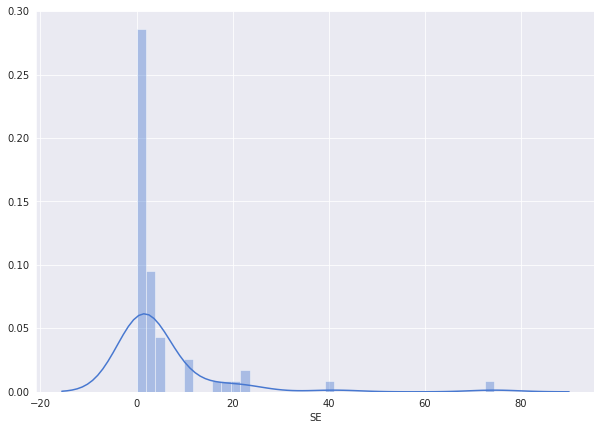

In [197]:
plt.figure(figsize=(10,7))
sns.distplot(pred['SE'])

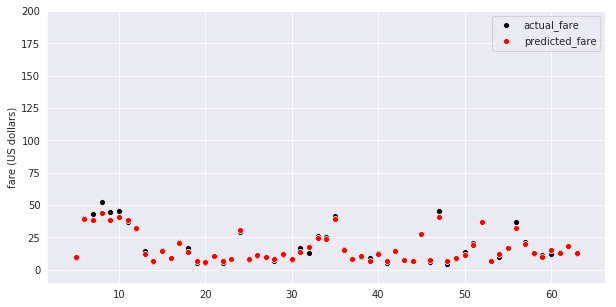

In [199]:
plt.figure(figsize=(10,5))
plt.gca().set_ylim(top=200)
plt.gca().set_ylim(bottom=-10)
sns.scatterplot(pred.index,pred['fare_dollars'], color='black')
sns.scatterplot(pred.index,pred['prediction'], color='red')
plt.gca().legend(('actual_fare','predicted_fare'))
plt.ylabel('fare (US dollars)')
plt.show()

In [200]:
R_sq2 = r2_score(pred['fare_dollars'], pred['prediction'], multioutput='variance_weighted') 
print('R-squared is: ', R_sq2)

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

MAPE1 = MAPE(pred['fare_dollars'], pred['prediction'])
print('MAPE is: ', MAPE1)

R-squared is:  0.966618511860465
MAPE is:  0.11118200355675868


# Session 7: Online prediction (require enable deploying in GCP)

1. deploy the model to enable online prediction

In [201]:
! curl -X POST \
-H "Authorization: Bearer $(gcloud auth application-default print-access-token)" \
https://automl.googleapis.com/v1beta1/projects/hackathon1-183523/locations/us-central1/models/TBL4988132411498823680:deploy

{
  "name": "projects/401832599639/locations/us-central1/operations/TBL1753611095139942400",
  "metadata": {
    "@type": "type.googleapis.com/google.cloud.automl.v1beta1.OperationMetadata",
    "createTime": "2019-06-28T17:40:50.769920Z",
    "updateTime": "2019-06-28T17:40:50.769920Z",
    "deployModelDetails": {}
  }
}


2. online prediction (sample test)

In [235]:
# create a json file to store the prediction features

import json

data = {
  "payload": {
    "row": {
      "values": [
        41.808916283,
        -87.596183344,
        "0",
        "Thu",
        "0",
        -87.61867776700001,
        "14",
        41.835117986
      ],
      "columnSpecIds": [
        "7914399045940936704",
        "2149791522906701824",
        "4455634532120395776",
        "9067320550547783680",
        "276294077920575488",
        "4887980096347963392",
        "2582137087134269440",
        "7193823105561657344"
      ]
    }
  }
}  

with open('request.json', 'w') as outfile:  
    json.dump(data, outfile)

In [236]:
! curl -X POST -H "Content-Type: application/json" \
  -H "Authorization: Bearer $(gcloud auth application-default print-access-token)" \
  https://automl.googleapis.com/v1beta1/projects/hackathon1-183523/locations/us-central1/models/TBL4988132411498823680:predict \
  -d @request.json

{
  "payload": [
    {
      "tables": {
        "value": 9.7516450881958,
        "predictionInterval": {
          "start": 4.7715277671813965,
          "end": 25.491241455078125
        }
      }
    }
  ]
}


3. undeploy after online prediction

In [ ]:
! curl -X POST \
-H "Authorization: Bearer $(gcloud auth application-default print-access-token)" \
https://automl.googleapis.com/v1beta1/projects/hackathon1-183523/locations/us-central1/models/TBL4988132411498823680:undeploy